In [102]:
using OrdinaryDiffEq, ModelingToolkit, DataDrivenDiffEq, SciMLSensitivity, DataDrivenSparse
using Optimization, OptimizationOptimisers, OptimizationOptimJL, LineSearches, Plots
# Standard Libraries
using LinearAlgebra, Statistics

# External Libraries
using ComponentArrays, Lux, Zygote, Plots, StableRNGs
gr()

Plots.GRBackend()

In [103]:
function marijuana_data!(du, u, p, t)
    β, s, N = p
    du[1] = - β * (u[1] * u[3])/N
    du[2] =  β * (u[1] * u[3])/N - s * u[2]
    du[3] = s * u[2] 
end

marijuana_data! (generic function with 1 method)

In [104]:
tspan = (0,365)
u0 = [3762220;470333;4703]
p_ = [0.05, 0.011, 4237256]
prob = ODEProblem(marijuana_data!, u0, tspan, p_)
solution = solve(prob, Vern7(), abstol = 1e-12, reltol = 1e-12, saveat = 0.25)

retcode: Success
Interpolation: 1st order linear
t: 1461-element Vector{Float64}:
   0.0
   0.25
   0.5
   0.75
   1.0
   1.25
   1.5
   1.75
   2.0
   2.25
   2.5
   2.75
   3.0
   ⋮
 362.25
 362.5
 362.75
 363.0
 363.25
 363.5
 363.75
 364.0
 364.25
 364.5
 364.75
 365.0
u: 1461-element Vector{Vector{Float64}}:
 [3.76222e6, 470333.0, 4703.0]
 [3.7621606323144827e6, 469100.65047790523, 5994.717207612104]
 [3.7620869484658046e6, 467885.9817491915, 7283.0697850035485]
 [3.761998986366414e6, 466688.9073981924, 8568.106235393492]
 [3.761896783551185e6, 465509.34162361186, 9849.87482520331]
 [3.761780377178697e6, 464347.19923556066, 11128.423585742377]
 [3.7616498040325246e6, 463202.3956525904, 12403.800314885082]
 [3.761505100522537e6, 462074.8468987224, 13676.052578740573]
 [3.761346302686212e6, 460964.46960047714, 14945.227713310693]
 [3.761173446189959e6, 459871.1809838918, 16211.372826149143]
 [3.7609865663304534e6, 458794.8988715471, 17474.53479799956]
 [3.760785698035983e6, 457735.5

In [105]:
X = Array(solution)
t = solution.t
susceptible = X[1, :]
endemic = X[2, :]
users = X[3, :]
x̄ = mean(X, dims = 2)
noise_magnitude = 5e-3
Xₙ = X .+ (noise_magnitude * x̄) .* randn(rng, eltype(X), size(X))



3×1461 Matrix{Float64}:
     3.75878e6     3.76271e6     3.75753e6  …  6097.02       16659.5
     4.68527e5     4.58766e5     4.68368e5        3.95106e5      4.00672e5
 30306.5        -490.081      6210.89             3.83976e6      3.83064e6

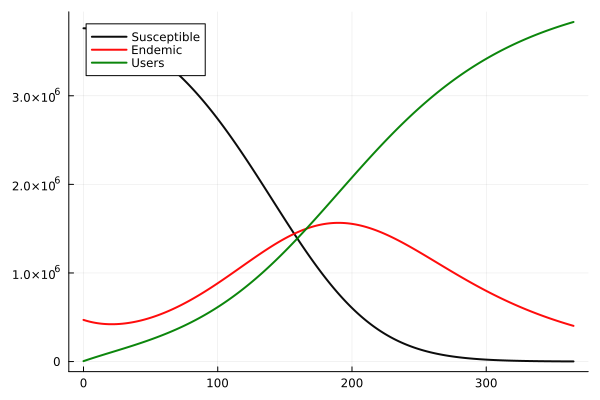

In [106]:
plot(t,susceptible, alpha = 0.95, color = :black, label = ["Susceptible" nothing], linewidth=2)
plot!(t,endemic, alpha = 0.95, color = :red, label = ["Endemic" nothing], linewidth=2)
plot!(t,users, alpha = 0.95, color = :green, label = ["Users" nothing], linewidth=2)
# s = scatter!(t, transpose(Xₙ), color = :red, label = ["Noisy Data" nothing])